In [1]:
using PyPlot
PyPlot.svg(true)

using DataFrames

We shall discuss the relationship between the statics of the Higher Education Entrance Examination and the Maxwell–Boltzmann distribution of thermology in this article.

Consider the distribution of the velocity of the gas molecule in a certain temprature $T$, where the mess of a single molecule is $m$ and the Boltzmann's constant is $k$:

$$ f(v) = 4 \pi ({m \over 2 \pi k T})^\frac{3}{2} e^{- \frac{m v^2}{2 k T}} v^2 $$

In [2]:
table = readtable("exam_data.csv")
A = Array(table)

314×2 Array{Int64,2}:
 705  1
 703  1
 700  1
 697  1
 696  2
 695  2
 694  2
 693  4
 692  6
 691  4
 690  3
 689  7
 688  8
   ⋮   
 115  6
 105  8
  95  8
  85  5
  75  5
  65  6
  55  5
  45  4
  35  3
  25  0
  15  8
   5  0

In [3]:
B = hcat(map(x->x[1]>425?x:[x[1], x[2]/10], [A[x, :] for x in 1:size(A)[1]])...)'

314×2 Array{Float64,2}:
 705.0  1.0
 703.0  1.0
 700.0  1.0
 697.0  1.0
 696.0  2.0
 695.0  2.0
 694.0  2.0
 693.0  4.0
 692.0  6.0
 691.0  4.0
 690.0  3.0
 689.0  7.0
 688.0  8.0
   ⋮       
 115.0  0.6
 105.0  0.8
  95.0  0.8
  85.0  0.5
  75.0  0.5
  65.0  0.6
  55.0  0.5
  45.0  0.4
  35.0  0.3
  25.0  0.0
  15.0  0.8
   5.0  0.0

Assume the following equation is approximately correct:

$$ y = \alpha e^{-\beta x^2} \cdot x^2$$

thus

$$ \frac{y}{x^2} = \alpha \cdot e^{-\beta x^2} $$

let $ u = \log \frac{y}{x^2} $, $ v = x^2 $

$$ u = - \beta v + \log \alpha $$

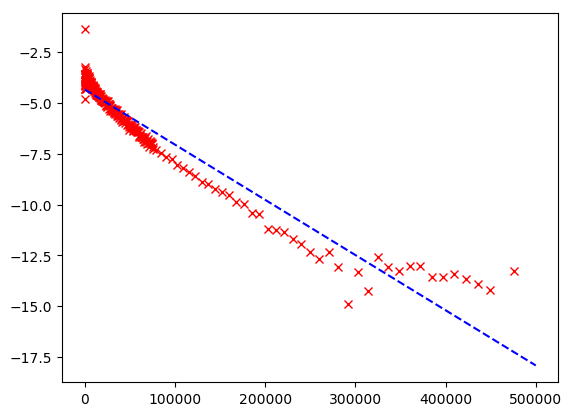

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12b97ff10>

In [4]:
highscore = max(B[:, 1]...)
x = (highscore .- B[2:end, 1])
y = B[2:end, 2]

_u = log.(y./(x.^2))
_v = x.^2

real_(x) = x!=Inf&&x!=-Inf&&x!=NaN

u = _u[real_.(_u)]
v = _v[real_.(_u)]

k, b = [v ones(length(v))]\u
α = e^b
β = -k

v_ = linspace(0, 500000, 1000)
#plot(x′, α.*e.^(-β.*x′.^2).*x′.^2)
#plot(x′, 2.*e.^(-0.5.*x′.^2).*x′.^2)
plot(v, u, "rx")
plot(v_, k.*v_.+b, "b--")

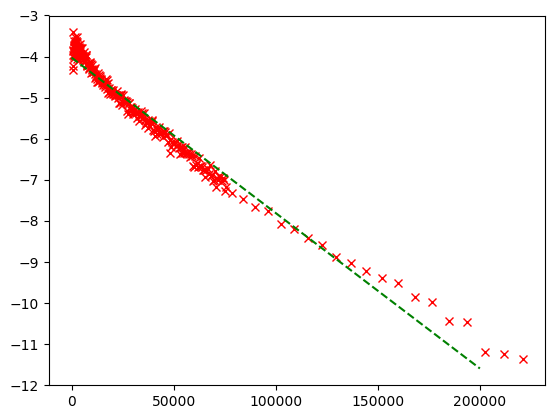

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x135dfa1d0>

In [5]:
_u′ = log.(y./(x.^2))[20:290]
_v′ = (x.^2)[20:290]

u′ = _u′[real_.(_u′)]
v′ = _v′[real_.(_u′)]

k′, b′ = [v′ ones(length(v′))]\u′
α′ = e^b′
β′ = -k′

v′′ = linspace(0, 200000, 1000)
#plot(x′, α.*e.^(-β.*x′.^2).*x′.^2)
#plot(x′, 2.*e.^(-0.5.*x′.^2).*x′.^2)
plot(v′, u′, "rx")
plot(v′′, k′.*v′′.+b′, "g--")

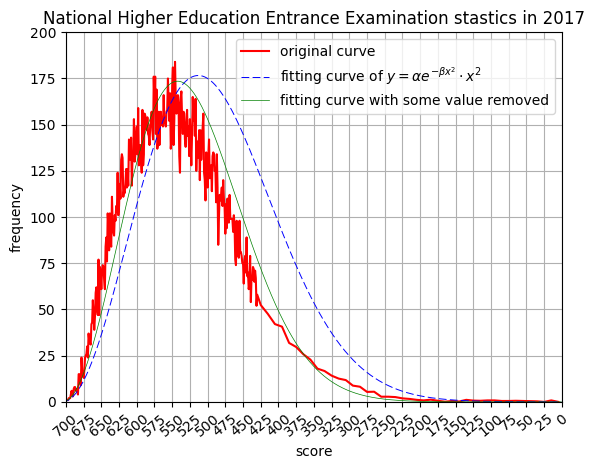

In [6]:
plot(highscore.-x, y, "r-", label="original curve")
t = highscore:-1:1
plot(t, α.*e.^(-β.*(highscore.-t).^2).*(highscore.-t).^2, "b--", linewidth=0.7, label=L"fitting curve of $y = \alpha e^{-\beta x^2} \cdot x^2$")
plot(t, α′.*e.^(-β′.*(highscore.-t).^2).*(highscore.-t).^2, "g-", linewidth=0.5, label="fitting curve with some value removed")

title("National Higher Education Entrance Examination stastics in 2017")
legend()
axis([700, 0, 0, 200])
xticks(700:-25:0, rotation=40)
xlabel("score")
ylabel("frequency")
grid(true)